In [1]:
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from config import conn

In [2]:
conn =conn()
cursor = conn.cursor()


sql_query = """
select * from tmp_dm_student_status where stu_lesson_type_two <>2 order by stu_id 
"""
data = pd.read_sql(sql_query, conn)
data.drop(columns=['remainder_hour'],inplace=True)
data.drop(columns=['stu_name'],inplace=True)
data.drop(columns=['stu_lesson_type'],inplace=True)
conn.close()

C:\Users\HH\AppData\Local\Temp\ipykernel_119500\3637193676.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(sql_query, conn)


In [3]:
train_data = data[data['city_name']=='上海市']
print(train_data.shape)
train_data.head(100)
# train_data.info()

(127047, 19)


,stu_id,stu_age,stu_gender,contract_num,total_contract_amt,total_lesson_cnt,subject_cnt,lesson_age,stu_lesson_type_two,store_num,renew_status,3month_finished_lesson_qty,6month_finished_lesson_qty,12month_finished_lesson_qty,xingjian,xufu,shenji,city_name,store_list
0,160,3,1.0,2,11160.0,150,1,123,0,1.0,1,0,0,0,0,0,0,上海市,"七宝,长寿路"
1,21851,38,1.0,4,58440.0,1242,6,112,0,3.0,1,3,5,21,0,0,0,上海市,"世纪,南方,天山,徐汇"
2,21873,3,0.0,1,7980.0,130,2,115,1,1.0,1,14,27,27,0,0,0,上海市,大华
3,21883,41,1.0,2,7416.0,124,1,109,1,2.0,1,6,14,21,0,0,0,上海市,"漕宝日月光,徐汇"
4,21899,3,1.0,1,8800.0,121,1,124,1,1.0,1,14,23,39,0,0,0,上海市,五角场
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,75617,19,1.0,2,21720.0,134,2,123,1,1.0,1,8,16,47,1,0,0,上海市,南方
97,75620,43,0.0,1,12800.0,164,1,123,1,1.0,1,7,7,7,0,0,0,上海市,南方
98,75621,15,1.0,3,53940.0,612,4,123,0,1.0,1,3,3,5,0,0,0,上海市,南方
99,75627,16,1.0,2,16160.0,164,2,123,1,1.0,1,14,37,82,0,0,0,上海市,南方


In [4]:
test_data = data
print(test_data.shape)
test_data.head(120000)

(241459, 19)


,stu_id,stu_age,stu_gender,contract_num,total_contract_amt,total_lesson_cnt,subject_cnt,lesson_age,stu_lesson_type_two,store_num,renew_status,3month_finished_lesson_qty,6month_finished_lesson_qty,12month_finished_lesson_qty,xingjian,xufu,shenji,city_name,store_list
0,160,3,1.0,2,11160.0,150,1,123,0,1.0,1,0,0,0,0,0,0,上海市,"七宝,长寿路"
1,21851,38,1.0,4,58440.0,1242,6,112,0,3.0,1,3,5,21,0,0,0,上海市,"世纪,南方,天山,徐汇"
2,21873,3,0.0,1,7980.0,130,2,115,1,1.0,1,14,27,27,0,0,0,上海市,大华
3,21883,41,1.0,2,7416.0,124,1,109,1,2.0,1,6,14,21,0,0,0,上海市,"漕宝日月光,徐汇"
4,21899,3,1.0,1,8800.0,121,1,124,1,1.0,1,14,23,39,0,0,0,上海市,五角场
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1187646,10,0.0,2,24396.0,276,2,64,0,1.0,1,19,30,53,0,0,0,杭州市,黄龙
119996,1187647,5,1.0,1,7596.0,80,3,62,0,1.0,1,0,0,0,0,0,0,杭州市,黄龙
119997,1187648,5,1.0,4,46768.0,514,3,64,0,1.0,1,9,20,28,0,0,0,杭州市,黄龙
119998,1187649,5,1.0,3,23076.0,220,2,64,0,1.0,1,4,4,4,0,1,0,杭州市,黄龙


In [5]:
print(data.shape)
data.info()
data.describe()
data.fillna(0)
data.replace()
data['stu_gender']=data['stu_gender'].fillna(1)
data['store_num']=data['store_num'].fillna(0)

(241459, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241459 entries, 0 to 241458
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stu_id                       241459 non-null  int64  
 1   stu_age                      241459 non-null  int64  
 2   stu_gender                   241409 non-null  float64
 3   contract_num                 241459 non-null  int64  
 4   total_contract_amt           241459 non-null  float64
 5   total_lesson_cnt             241459 non-null  int64  
 6   subject_cnt                  241459 non-null  int64  
 7   lesson_age                   241459 non-null  int64  
 8   stu_lesson_type_two          241459 non-null  int64  
 9   store_num                    234491 non-null  float64
 10  renew_status                 241459 non-null  int64  
 11  3month_finished_lesson_qty   241459 non-null  int64  
 12  6month_finished_lesson_qty   241459 non-null 

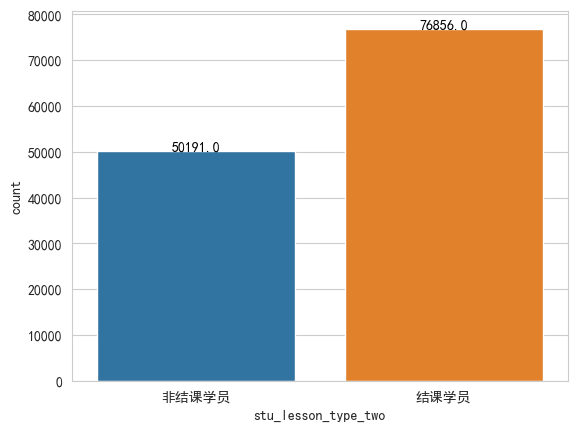

In [6]:
plt.figure()
ax = sns.countplot(x='stu_lesson_type_two', data=train_data)
x_labels = ax.get_xticklabels()
new_labels = ['非结课学员', '结课学员']
ax.set_xticklabels(new_labels)
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, round(height, 2),color="black", ha='center')
plt.show()


In [7]:
train_data.drop(columns=['city_name'],inplace=True)
test_data.drop(columns=['city_name'],inplace=True)
# data.drop(columns=['city_name'],inplace=True)
train_data.drop(columns=['store_list'],inplace=True)
test_data.drop(columns=['store_list'],inplace=True)

C:\Users\HH\AppData\Local\Temp\ipykernel_119500\3976626187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['city_name'],inplace=True)
C:\Users\HH\AppData\Local\Temp\ipykernel_119500\3976626187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['store_list'],inplace=True)


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241459 entries, 0 to 241458
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stu_id                       241459 non-null  int64  
 1   stu_age                      241459 non-null  int64  
 2   stu_gender                   241459 non-null  float64
 3   contract_num                 241459 non-null  int64  
 4   total_contract_amt           241459 non-null  float64
 5   total_lesson_cnt             241459 non-null  int64  
 6   subject_cnt                  241459 non-null  int64  
 7   lesson_age                   241459 non-null  int64  
 8   stu_lesson_type_two          241459 non-null  int64  
 9   store_num                    241459 non-null  float64
 10  renew_status                 241459 non-null  int64  
 11  3month_finished_lesson_qty   241459 non-null  int64  
 12  6month_finished_lesson_qty   241459 non-null  int64  
 13 

In [9]:
#stu_age
def resetAge(input):
    if input > 18:
        return 4
    elif (input > 13) | (input <= 18):
        return 3
    elif (input > 7) | (input <=13):
        return 2
    elif (input > 0) | (input <= 7) :
        return 1
    else:
        return 0

In [10]:
data['stu_age']=data['stu_age'].apply(resetAge)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241459 entries, 0 to 241458
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stu_id                       241459 non-null  int64  
 1   stu_age                      241459 non-null  int64  
 2   stu_gender                   241459 non-null  float64
 3   contract_num                 241459 non-null  int64  
 4   total_contract_amt           241459 non-null  float64
 5   total_lesson_cnt             241459 non-null  int64  
 6   subject_cnt                  241459 non-null  int64  
 7   lesson_age                   241459 non-null  int64  
 8   stu_lesson_type_two          241459 non-null  int64  
 9   store_num                    241459 non-null  float64
 10  renew_status                 241459 non-null  int64  
 11  3month_finished_lesson_qty   241459 non-null  int64  
 12  6month_finished_lesson_qty   241459 non-null  int64  
 13 

In [11]:
num=train_data.shape[0]
train_val_x=train_data.iloc[:num].drop(columns=['stu_lesson_type_two'])
train_val_y=train_data.iloc[:num]['stu_lesson_type_two']
test_x=data.drop('stu_lesson_type_two',axis=1)
train_x,val_x,train_y,val_y=train_test_split(train_val_y,train_val_x,test_size=0.25,random_state=45)

In [12]:
model=LogisticRegression(C=0.5,solver='newton-cg').fit(train_val_x,train_val_y)
result=model.predict_proba(test_x)
result

d:\app\python3.9\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\app\python3.9\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\app\python3.9\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


array([[0.04409053, 0.95590947],
       [0.93882818, 0.06117182],
       [0.05097854, 0.94902146],
       ...,
       [0.6721275 , 0.3278725 ],
       [0.52715186, 0.47284814],
       [0.49671564, 0.50328436]])

In [13]:
from sklearn.model_selection import cross_val_score
model={}
model['lr']=LogisticRegression()	# ‘lr': 逻辑回归分类器 (LogisticRegression)
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='roc_auc')
    print('%s的auc为：%.3f'%(i,score.mean()))

d:\app\python3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr的auc为：0.905


In [14]:
user_ids = test_x['stu_id']  
predictions = result[:, 1]  # 获取Logistic Regression的预测概率，0是非结课概率 1是结课概率

# 创建包含user_id和stu_lesson_type_two概率的DataFrame
result_df = pd.DataFrame({'stu_id': user_ids, '结课概率': predictions})
# 按照user_id进行升序排序
sorted_result = result_df.sort_values(by='stu_id')

# 将结果保存到CSV文件
sorted_result.to_csv('11.09号预测结果5.csv', index=False)

# 打印前几行结果
sorted_result.head(31)

,stu_id,结课概率
0,160,0.955909
1,21851,0.061172
2,21873,0.949021
3,21883,0.963080
4,21899,0.983660
5,75205,0.144613
6,75207,0.399895
7,75210,0.088411
8,75217,0.976086
9,75222,0.392124


In [15]:
print(result_df[result_df['stu_id'] == 21873])

   stu_id      结课概率
2   21873  0.949021


In [16]:
print(result_df.shape)
result_df.head(100)
# result_df.info()

(241459, 2)


,stu_id,结课概率
0,160,0.955909
1,21851,0.061172
2,21873,0.949021
3,21883,0.963080
4,21899,0.983660
...,...,...
95,75613,0.923794
96,75617,0.968510
97,75620,0.960403
98,75621,0.264720


In [17]:
from config import conn
con =conn()
cursor = con.cursor()


sql_query = """
select stu_id              ,
       stu_name            as '学生名',
       stu_age             as '学生年龄',
       stu_gender          as '学生性别 1女0男',
       stu_lesson_type     as '类型 0:沉睡学员 1:活跃学员 2:未开课 3:结课',
       stu_lesson_type_two as '二分类 0是非结课，1是结课',
       remainder_hour      as '剩余课时数',
       renew_status        as '是否可续费',
       city_name           as '城市',
       store_list          as '分馆'
from tmp_dm_student_status
where stu_lesson_type_two <> 2
order by stu_id
"""
data10 = pd.read_sql(sql_query, con)
con.close()

C:\Users\HH\AppData\Local\Temp\ipykernel_119500\1647649301.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data10 = pd.read_sql(sql_query, con)


In [18]:
new_data=data10.set_index('stu_id').join(result_df.set_index('stu_id'),on='stu_id')
print(new_data.shape)
new_data.head(100000).sort_values('stu_id',ascending=True)

(241459, 10)


,学生名,学生年龄,学生性别 1女0男,类型 0:沉睡学员 1:活跃学员 2:未开课 3:结课,二分类 0是非结课，1是结课,剩余课时数,是否可续费,城市,分馆,结课概率
stu_id,,,,,,,,,,
160,杨杨,3,1.0,2,0,110.0,1,上海市,"七宝,长寿路",0.955909
21851,许金利,38,1.0,0,0,128.0,1,上海市,"世纪,南方,天山,徐汇",0.061172
21873,宋剑,3,0.0,3,1,0.0,1,上海市,大华,0.949021
21883,蔡颖珏徐汇,41,1.0,3,1,0.0,1,上海市,"漕宝日月光,徐汇",0.963080
21899,潘迦弈,3,1.0,3,1,0.0,1,上海市,五角场,0.983660
...,...,...,...,...,...,...,...,...,...,...
1029357,刘绮涵,2,1.0,0,0,2.0,1,上海市,金桥,0.810923
1029426,崔懿欣,10,1.0,3,1,0.0,1,上海市,共康,0.757219
1029435,姚又诚,4,0.0,3,1,0.0,1,上海市,控江,0.846730


In [19]:
new_data.reset_index(inplace=True)
new_data.to_csv('11.9号预测结果.csv', index=False)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score

# 分割数据为训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(train_val_x,train_val_y, test_size=0.2, random_state=42)

# 训练LogisticRegression模型
model = LogisticRegression(C=0.5, solver='newton-cg')
model.fit(train_x, train_y)

# 预测测试集数据
predicted_probabilities = model.predict_proba(test_x)[:, 1]

# 计算AUC
roc_auc = roc_auc_score(test_y, predicted_probabilities)
print(f'ROC AUC: {roc_auc}')

# 计算准确率
accuracy = accuracy_score(test_y, predicted_probabilities.round())
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(test_y, predicted_probabilities.round())
print(f'Recall: {recall}')

# 计算F1分数
f1 = f1_score(test_y, predicted_probabilities.round())
print(f'F1 Score: {f1}')


ROC AUC: 0.8732888843315877
Accuracy: 0.8256591892955529
Recall: 0.9114579917360792
F1 Score: 0.8625248262164846


d:\app\python3.9\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
